In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D  # import do 3D

In [8]:
# 1. Wczytaj dane
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# 2. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standaryzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 4. PCA – redukcja do 3D
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Model SVM (SGDClassifier)
clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_pca, y_train)

SGDClassifier(random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SGDClassifier ? Documentation for SGDClassifier i Fitted SGDClassifier(random_state=42)

In [5]:
# 6. Predykcja i ocena
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f"Dokładność: {accuracy:.4f}")
print(report)

Dokładność: 0.9825
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



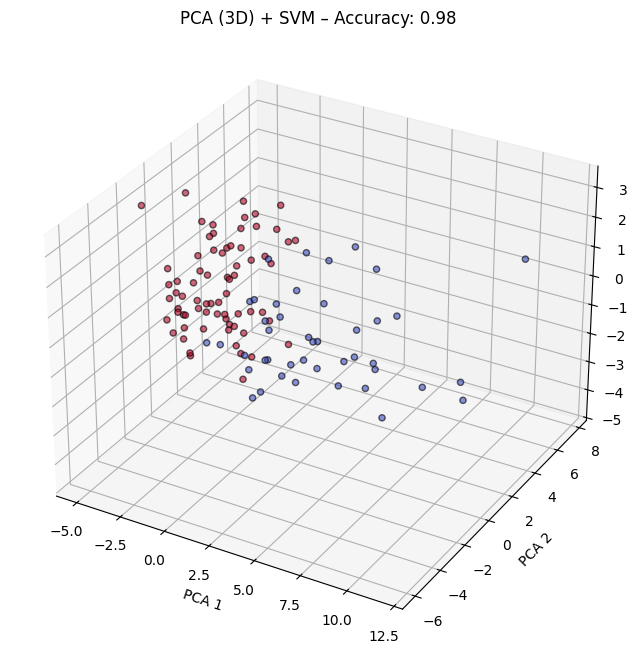

In [6]:
# 7. Wizualizacja 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
    c=y_pred, cmap='coolwarm', alpha=0.6, edgecolors='k'
)
ax.set_title(f'PCA (3D) + SVM – Accuracy: {accuracy:.2f}')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

In [7]:
import plotly.express as px
import pandas as pd

In [9]:
df_plot = pd.DataFrame(X_test_pca,columns=['PCA1','PCA2','PCA3'])
df_plot["Predicted_label"] = [target_names[i] for i in y_pred]

#interaktywny wykres 3D
fig = px.scatter_3d(
    df_plot,x="PCA1",y="PCA2",z="PCA3",
    color = "Predicted_label",
    title = "PCA(3D)  SVM - interactive",
    opacity = 0.7
)

fig.update_traces(marker=dict(size=5))
fig.show()